In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("cardiac_risk.csv")

In [3]:
df.head()

,id,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0


In [4]:
df=df.drop(["id","age in days"],axis=1)

In [5]:
df

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,54,2,168,76.0,120,80,100.0,1,1,1,0,1,0
69996,63,1,158,126.0,140,90,115.0,2,2,0,0,1,1
69997,54,2,183,105.0,180,90,135.0,3,1,0,1,0,1
69998,63,1,163,72.0,135,80,107.5,1,2,0,0,0,1


In [6]:
df["height_in_cm"]=df["height_in_cm"]/100

In [7]:
df

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,52,2,1.68,62.0,110,80,95.0,1,1,0,0,1,0
1,57,1,1.56,85.0,140,90,115.0,3,1,0,0,1,1
2,53,1,1.65,64.0,130,70,100.0,3,1,0,0,0,1
3,50,2,1.69,82.0,150,100,125.0,1,1,0,0,1,1
4,49,1,1.56,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,54,2,1.68,76.0,120,80,100.0,1,1,1,0,1,0
69996,63,1,1.58,126.0,140,90,115.0,2,2,0,0,1,1
69997,54,2,1.83,105.0,180,90,135.0,3,1,0,1,0,1
69998,63,1,1.63,72.0,135,80,107.5,1,2,0,0,0,1


In [8]:
df["height_in_cm"]=df["height_in_cm"]**2

In [9]:
df

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,52,2,2.8224,62.0,110,80,95.0,1,1,0,0,1,0
1,57,1,2.4336,85.0,140,90,115.0,3,1,0,0,1,1
2,53,1,2.7225,64.0,130,70,100.0,3,1,0,0,0,1
3,50,2,2.8561,82.0,150,100,125.0,1,1,0,0,1,1
4,49,1,2.4336,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,54,2,2.8224,76.0,120,80,100.0,1,1,1,0,1,0
69996,63,1,2.4964,126.0,140,90,115.0,2,2,0,0,1,1
69997,54,2,3.3489,105.0,180,90,135.0,3,1,0,1,0,1
69998,63,1,2.6569,72.0,135,80,107.5,1,2,0,0,0,1


In [10]:
df['bmi']=df["weight_in_kg"]/df["height_in_cm"]

In [11]:
df

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,52,2,2.8224,62.0,110,80,95.0,1,1,0,0,1,0,21.967120
1,57,1,2.4336,85.0,140,90,115.0,3,1,0,0,1,1,34.927679
2,53,1,2.7225,64.0,130,70,100.0,3,1,0,0,0,1,23.507805
3,50,2,2.8561,82.0,150,100,125.0,1,1,0,0,1,1,28.710479
4,49,1,2.4336,56.0,100,60,80.0,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,54,2,2.8224,76.0,120,80,100.0,1,1,1,0,1,0,26.927438
69996,63,1,2.4964,126.0,140,90,115.0,2,2,0,0,1,1,50.472681
69997,54,2,3.3489,105.0,180,90,135.0,3,1,0,1,0,1,31.353579
69998,63,1,2.6569,72.0,135,80,107.5,1,2,0,0,0,1,27.099251


In [12]:
df=df.drop(["height_in_cm","weight_in_kg"],axis=1)

In [13]:
df

,age,gender,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,52,2,110,80,95.0,1,1,0,0,1,0,21.967120
1,57,1,140,90,115.0,3,1,0,0,1,1,34.927679
2,53,1,130,70,100.0,3,1,0,0,0,1,23.507805
3,50,2,150,100,125.0,1,1,0,0,1,1,28.710479
4,49,1,100,60,80.0,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,54,2,120,80,100.0,1,1,1,0,1,0,26.927438
69996,63,1,140,90,115.0,2,2,0,0,1,1,50.472681
69997,54,2,180,90,135.0,3,1,0,1,0,1,31.353579
69998,63,1,135,80,107.5,1,2,0,0,0,1,27.099251


In [14]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='bmi'>

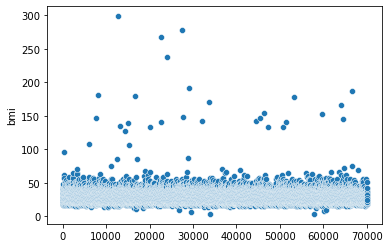

In [15]:
sns.scatterplot(df.index,df.bmi)


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='bp_hi'>

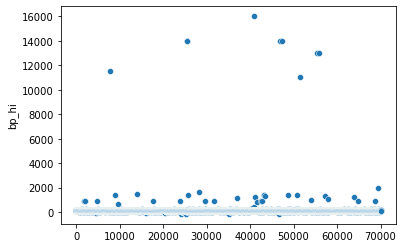

In [16]:
sns.scatterplot(df.index,df["bp_hi"])

In [17]:
li=list(df[df["bmi"]>37].index)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

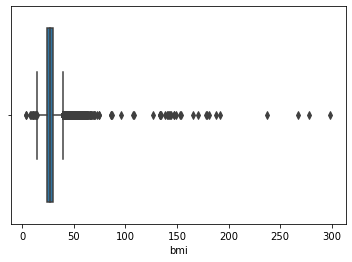

In [18]:
sns.boxplot(df.bmi)

In [19]:
df=df.drop(li,axis=0)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

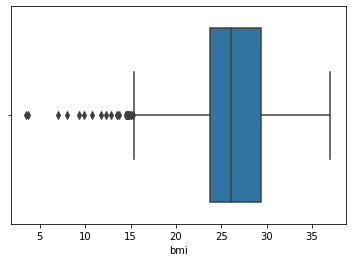

In [20]:
sns.boxplot(df.bmi)

In [21]:
li=list(df[df["bmi"]<17].index)

In [22]:
df=df.drop(li,axis=0)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

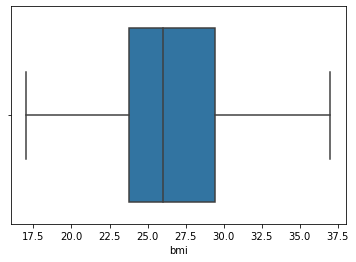

In [23]:
sns.boxplot(df.bmi)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='bmi'>

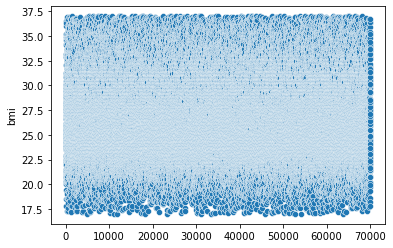

In [24]:
sns.scatterplot(df.index,df.bmi)

In [25]:
df.cardio.value_counts()

0    33716
1    32286
Name: cardio, dtype: int64

In [26]:
li = df[df["cardio"]==0].sample(1430).index

In [27]:
df=df.drop(li,axis=0)

In [28]:
df.cardio.value_counts()

1    32286
0    32286
Name: cardio, dtype: int64

In [29]:
df.reset_index(drop=True,inplace=True)

In [30]:
x=df.drop(["cardio"],axis=1)
y=df.cardio

In [31]:
x

,age,gender,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,bmi
0,52,2,110,80,95.0,1,1,0,0,1,21.967120
1,57,1,140,90,115.0,3,1,0,0,1,34.927679
2,53,1,130,70,100.0,3,1,0,0,0,23.507805
3,50,2,150,100,125.0,1,1,0,0,1,28.710479
4,49,1,100,60,80.0,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...
64567,59,1,150,80,115.0,1,1,0,0,1,29.384757
64568,54,2,120,80,100.0,1,1,1,0,1,26.927438
64569,54,2,180,90,135.0,3,1,0,1,0,31.353579
64570,63,1,135,80,107.5,1,2,0,0,0,27.099251


In [32]:
y

0        0
1        1
2        1
3        1
4        0
        ..
64567    1
64568    0
64569    1
64570    1
64571    0
Name: cardio, Length: 64572, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [35]:
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6514
           1       0.74      0.66      0.70      6401

    accuracy                           0.72     12915
   macro avg       0.72      0.72      0.72     12915
weighted avg       0.72      0.72      0.72     12915



Print the Confusion Matrix
[[5042 1472]
 [2178 4223]]


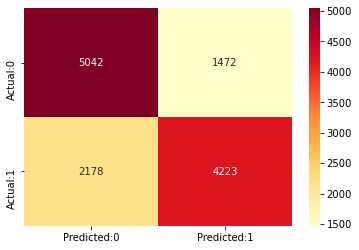

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlOrRd");

# Decision Tree


In [39]:
from sklearn import tree
from sklearn import metrics
model = tree.DecisionTreeClassifier() 
model.fit(x, y)
model.score(x, y)
pred= model.predict(x)
print(metrics.accuracy_score(pred, y))
print(pred)

from sklearn.metrics import classification_report
print(classification_report(y, pred))

0.9750975655082699
[0 1 1 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     32286
           1       0.99      0.96      0.97     32286

    accuracy                           0.98     64572
   macro avg       0.98      0.98      0.98     64572
weighted avg       0.98      0.98      0.98     64572



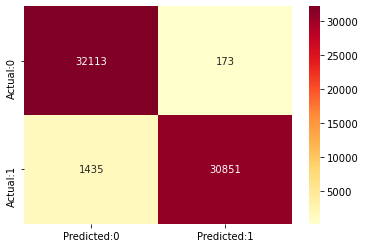

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,pred)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlOrRd");

# Random Forest

In [41]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier(n_estimators=2)
classifier.fit(x, y)

pred = classifier.predict(x)
metrics.accuracy_score(pred, y)
print(metrics.accuracy_score(pred, y))
print(pred)
from sklearn.metrics import classification_report
print(classification_report(y,pred))


0.8576472774577216
[0 1 0 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     32286
           1       0.94      0.76      0.84     32286

    accuracy                           0.86     64572
   macro avg       0.87      0.86      0.86     64572
weighted avg       0.87      0.86      0.86     64572



<AxesSubplot:>

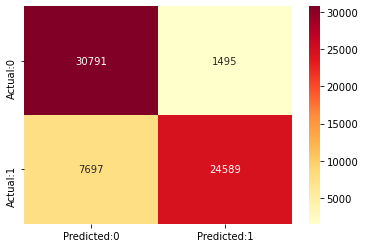

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,pred)
cm
conf_matrix=pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="YlOrRd")

NAIVE BAYES

In [43]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(x, y) 

#Predict Output
predicted= model.predict(x)
print(metrics.accuracy_score(predicted, y))
print(predicted)
from sklearn.metrics import classification_report
print(classification_report(y, predicted))

0.573963947221706
[0 1 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.54      0.92      0.68     32286
           1       0.74      0.23      0.35     32286

    accuracy                           0.57     64572
   macro avg       0.64      0.57      0.52     64572
weighted avg       0.64      0.57      0.52     64572

